In [65]:
import pandas as pd  #pacotes
import numpy as np   #calculo numerico
import glob          #listas
#Codigo para declarar um pyarrow parquet - Willian - 29/05/2018
import pyarrow.parquet as pq
#uproot serve para ler a partir o python um arquivo em tree root
#import uproot
import os, sys
from os import path
import datetime
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit
%matplotlib inline

In [66]:
%run def_functions.ipynb
%run def_functions_hits.ipynb
%run def_functions_fits.ipynb


In [68]:
#chi_sq_tab = 2.366  # chi quadrado tabelado para 3 graus de liberdades com 50%
#chi_sq_tab = 6.251  # chi quadrado tabelado para 3 graus de liberdades com 90%
chi_sq_tab = 7.815  # chi quadrado tabelado para 3 graus de liberdades com 95%
#chi_sq_tab = 10.597  # chi quadrado tabelado para 3 graus de liberdades com 995%
rh, rw = 150, 150
prompt_mean, prompt_var = 61.45215100965759, 1337.7332240825515
delay_mean, delay_var = 94.3970297029703, 4899.284941672385 
time_mean, time_var = 12.70, 12.70
itime_mean, itime_var = 1/12.70, 1/(12.70**2)

IBD_Esperado = 6610 #eventos por dia


## Simulação de IBD

In [131]:
%run def_functions_hits.ipynb

392541.89577
17243.402685740057


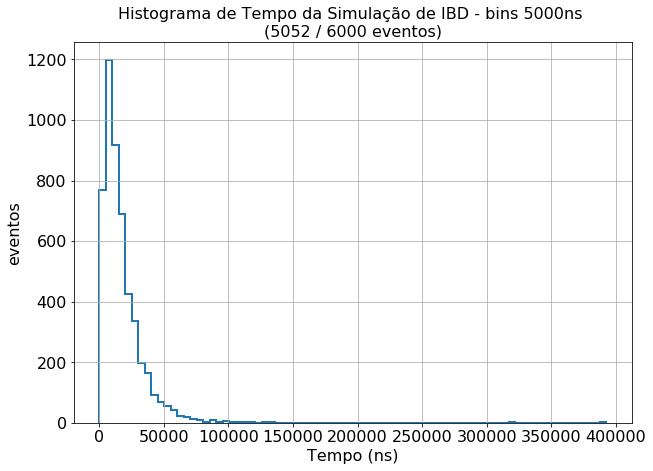

In [154]:
plt.rcParams.update({'font.size': 16})

list_sum = ['C:/Repositorio/Angra/vis/IBD.txt']
x = fnt_array_IBD_Time(list_sum)[0]
evs = fnt_array_IBD_Time(list_sum)[9]


fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
#ax.set_xlim([0, 400])
    
hist_bins = int(np.amax(x) / 5000)
print(np.amax(x))
print(np.mean(x))

plt.hist(x, bins=hist_bins, alpha=1, histtype='step', linewidth=2)
#plt.hist(x, alpha=1, histtype='step')
plt.grid(True)

plt.ylabel('eventos', size=16)
plt.xlabel('Tempo (ns)', size=16)  #(passa-banda)
plt.title('Histograma de Tempo da Simulação de IBD - bins 5000ns \n({:d} / {:d} eventos)'.format(len(p),evs), size=16,y=1.0)

plt.savefig('histogramas/Hist_Time_IBD.png')
plt.show()

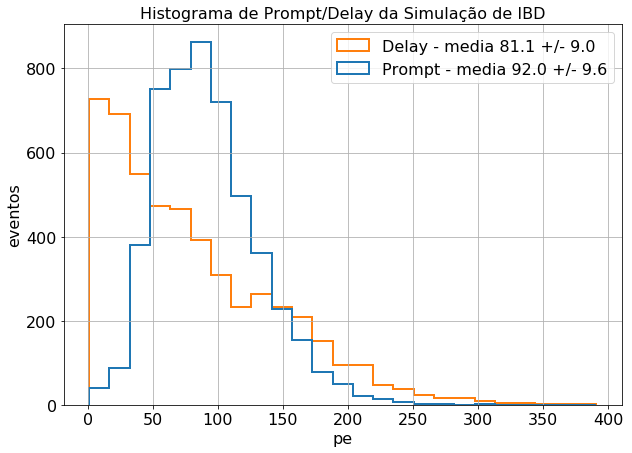

In [135]:
#%run def_functions_hits.ipynb

plt.rcParams.update({'font.size': 16})

list_sum = ['C:/Repositorio/Angra/vis/IBD.txt']
p = fnt_array_IBD_Time(list_sum)[1]
d = fnt_array_IBD_Time(list_sum)[2]
evs = fnt_array_IBD_Time(list_sum)[9]


fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
#ax.set_xlim([0, 400])
    
hist_bins = 25

#plt.hist(p, bins=hist_bins, alpha=1, histtype='step', linewidth=2)
plt.hist([p, d], bins=hist_bins, alpha=1, histtype='step', linewidth=2,
            label=['Prompt - media {:.1f} +/- {:.1f}'.format(np.mean(p),(np.mean(p)**0.5)),
                   'Delay - media {:.1f} +/- {:.1f}'.format(np.mean(d),(np.mean(d)**0.5))
                  ])

plt.legend(loc='upper right')
plt.grid(True)

plt.ylabel('eventos', size=16)
plt.xlabel('pe', size=16)  #(passa-banda)
plt.title('Histograma de Prompt/Delay da Simulação de IBD', size=16,y=1.0)

plt.savefig('histogramas/Hist_Prompt_Delay_IBD.png')
plt.show()

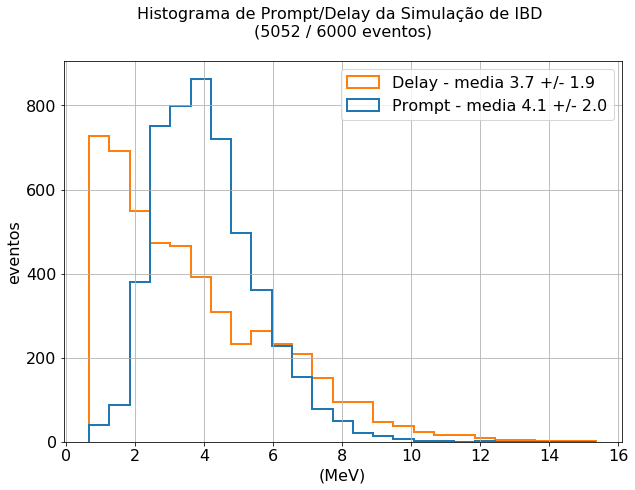

In [136]:
plt.rcParams.update({'font.size': 16})

list_sum = ['C:/Repositorio/Angra/vis/IBD.txt']
#print(fnt_array_IBD_Time(list_sum)[4])
p = fnt_array_IBD_Time(list_sum)[4]
d = fnt_array_IBD_Time(list_sum)[5]
evs = fnt_array_IBD_Time(list_sum)[9]


fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
#ax.set_xlim([0, 400])
    
hist_bins = 25

#plt.hist(p, bins=hist_bins, alpha=1, histtype='step', linewidth=2)
plt.hist([p, d], bins=hist_bins, alpha=1, histtype='step', linewidth=2,
            label=['Prompt - media {:.1f} +/- {:.1f}'.format(np.mean(p),(np.mean(p)**0.5)),
                   'Delay - media {:.1f} +/- {:.1f}'.format(np.mean(d),(np.mean(d)**0.5))
                  ])

plt.legend(loc='upper right')
plt.grid(True)

plt.ylabel('eventos', size=16)
plt.xlabel('(MeV)', size=16)  #(passa-banda)
plt.title('Histograma de Prompt/Delay da Simulação de IBD \n({:d} / {:d} eventos)'.format(len(p),evs), size=16,y=1.05)

plt.savefig('histogramas/Hist_Prompt_Delay_IBD_E.png')
plt.show()

In [137]:
rw = 300; rh = 300

t_subON = [[0 for x in range(rw)] for y in range(rh)]  

list_sum = ['C:/Repositorio/Angra/vis/IBD.txt']
p_pe = fnt_array_IBD_Time(list_sum)[1]
d_pe = fnt_array_IBD_Time(list_sum)[2]
evs = fnt_array_IBD_Time(list_sum)[9]



print('Inicio',datetime.datetime.now())

for index1 in range(len(p)):
    i=int(p_pe[index1]) #prompt int energy
    j=int(d_pe[index1]) #delay int energy
    if (i<rw)and(j<rh):
        t_subON[j][i]+=1 
    
#print(len(h_delay))
print('Fim',datetime.datetime.now())


Inicio 2023-07-27 14:27:39.343773
Fim 2023-07-27 14:27:39.359442


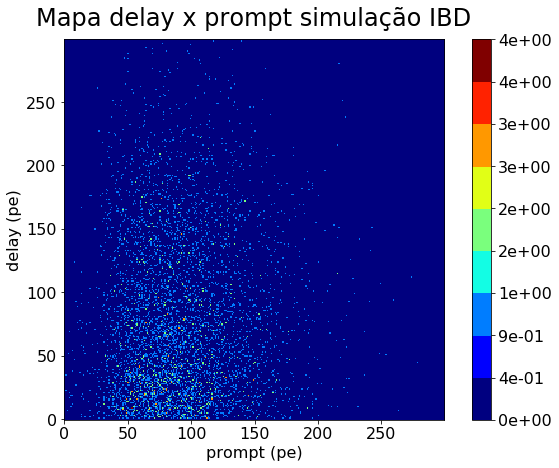

In [138]:
from matplotlib.colors import BoundaryNorm

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(np.min(t_subON),np.max(t_subON),10)
#bounds = np.linspace(0,3,10)
norm = BoundaryNorm(bounds, cmap.N)

fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

plt.rcParams.update({'font.size': 16})

myplot=plt.imshow(t_subON,interpolation='none',norm=norm,cmap=cmap,origin='lower')
plt.colorbar(myplot, format='%.0e')

#plt.colorbar()
plt.xlabel('prompt (pe)', size=16)
plt.ylabel('delay (pe)', size=16)
plt.title('Mapa delay x prompt simulação IBD', size=24,y=1.02)
plt.savefig('histogramas/Mapa-delay-prompt-IBD.png')
plt.show()

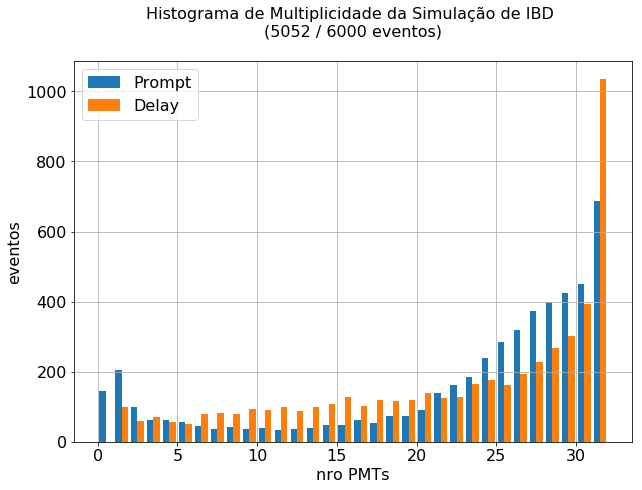

In [146]:
plt.rcParams.update({'font.size': 16})

list_sum = ['C:/Repositorio/Angra/vis/IBD.txt']
#print(fnt_array_IBD_Time(list_sum)[4])
#m = fnt_array_IBD_Time(list_sum)[3]
mp = fnt_array_IBD_Time(list_sum)[7] #mult prompt
md = fnt_array_IBD_Time(list_sum)[8] #mult delay
evs = fnt_array_IBD_Time(list_sum)[9]

fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
#ax.set_xlim([0, 400])
    
hist_bins = 32

#plt.hist(p, bins=hist_bins, alpha=1, histtype='step', linewidth=2)
plt.hist([mp, md], bins=hist_bins, alpha=1, histtype='bar', linewidth=2,
            label=['Prompt','Delay'])

plt.grid(True)
plt.legend(loc='upper left')

plt.ylabel('eventos', size=16)
plt.xlabel('nro PMTs', size=16)  #(passa-banda)
plt.title('Histograma de Multiplicidade da Simulação de IBD \n({:d} / {:d} eventos)'.format(len(mp),evs), size=16,y=1.05)

plt.savefig('histogramas/Hist_Multiplicidade_IBD_E.png')
plt.show()

In [117]:
%run def_functions_hits.ipynb

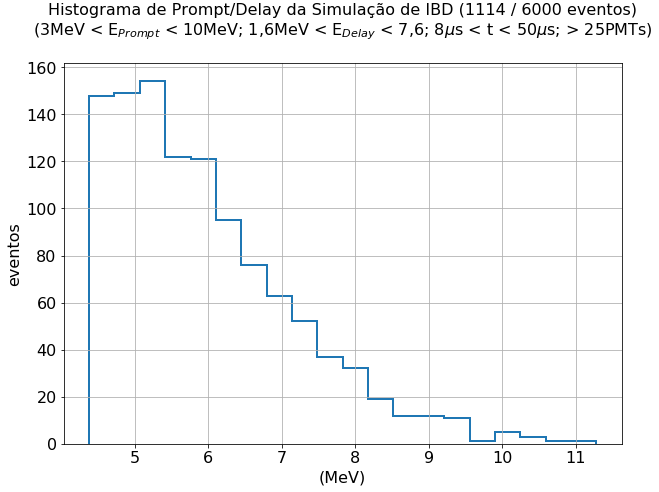

In [141]:
plt.rcParams.update({'font.size': 16})


list_sum = ['C:/Repositorio/Angra/vis/IBD.txt']
#print(fnt_array_IBD_Time(list_sum)[4])
n = fnt_array_IBD_Time(list_sum)[6]
evs = fnt_array_IBD_Time(list_sum)[9]

fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
#ax.set_xlim([0, 400])
    
hist_bins = 20

plt.hist(n, bins=hist_bins, alpha=1, histtype='step', linewidth=2)
#print(n)
#plt.hist(n,hist_bins, '-', drawstyle='steps')

plt.grid(True)

plt.ylabel('eventos', size=16)
plt.xlabel('(MeV)', size=16)  #(passa-banda)
plt.title('Histograma de Prompt/Delay da Simulação de IBD ({:d} / {:d} eventos)'.format(len(n),evs)+
          '\n(3MeV < E$_{Prompt}$ < 10MeV; 1,6MeV < E$_{Delay}$ < 7,6; 8$\mu$s < t < 50$\mu$s; > 25PMTs)', size=16,y=1.05)

plt.savefig('histogramas/Hist_Pairs_IBD_E.png')
plt.show()